# Improve Click Through Rate of Online Ads using Reinforcement learning (Multi Armed Bandits)

# SECTION 1: Business and Problem understanding

## 1. Introduction to online advertising

Ads are everywhere. Think about it.

Every webpage, video or 'real estate' on the internet has ads. The revenue you get from online ads are the bread and butter of internet companies, who inturn support so many other creators and developers.

The goal of online advertising is to make the customer perform a certain action (typically click on the ad).

The advertiser has multiple channels to reach the customer in the online medium, some of which are displayed below.

1. __Display Ads:__ Visual advertisements that appear on websites, in the form of banners, sidebars, or small rectangles.

2. __Search Engine Marketing (SEM)__: On search engine results pages (SERPs). 

3. __Social Media Ads:__ Platforms like Facebook, Instagram show ads based on user demographics, interests, and behavior.

4. __Native Advertising:__ Ads match the look and feel of the content on the platform where they appear, blending in more seamlessly with organic content.

5. __Video Ads:__ Ex: YouTube and social media

6. __Email Marketing:__ Promotional messagesdirectly to users' email inboxes.

7. __Influencer channel:__ Influencers promote products to followers.

8. __Mobile Ads:__ Specifically designed for mobile devices

9. __Interstitial Ads:__ Full-page ads

10. __Retargeting/Remarketing Ads:__ For users who have previously visited

11. __Rich Media Ads:__ Interactive ads that can expand, float, peel down, etc.

12. __Augmented Reality (AR) Ads:__ Create immersive ad experiences


<img src="types of ads.png" width=600 height=400/>

However, it is not well known which type of ad a given customer may perform action on before hand.

Reinforcement learning can be leveraged to learn which type of ad a given customer may respond to. One such approach is the __'Multi Armed Bandits'__

## 2. Overview of Multi Armed Bandits (MAB)

Multi Armed bandit is an indea borrowed from Casinos, where the player may get a reward by playing certain arms of slotting machines. 

A given slotting machine can have multiple arms. The player gets to play one arm at a time, and different arms have different rates of rewarding the player. That is, by trial and error or over experience, the user may learn to pull the arm that tends to give higher rewards.

<img src="slotting machines.png" width=600 height=400/>

Multi armed bandits are a class of reinforcement learning algorithms that tries to learn the strategy of play that reaps the maximum rewards. 

Our goal is to find out what strategy learns the fastest and gives the highest rewards.

Some of the popular MAB algorithms are the following:

1. Greedy
2. ϵ-greedy (Epsilon Greedy)
3. UCB1 (Upper Confidence Bound)
4. Thompson Sampling

Earlier, we saw how to apply these methods for dynamic pricing. In this course, we will see how to apply for the Online ad serving to improve the click through rate of ads that get served to a given customer.

## 3. Regret (revision)

Regret is the differnce between the maximum possible and the expected reward. The loss we incur when making repeated trials by pulling suboptimal arms in the process of learning is called regret.


<img src="regret.png" width=600 height=400/>

## 3.1 Exploitation vs Exploration




## 4. Problem Statement

Let's say you work for an ad serving company ABC Ads Inc (like media.net). Ad serving companies have advertisers paying them to run marketing ads, in order to maximize the returns from their marketing budget.

Typically, the end-user companies are not experts at running online ads. They work with ad serving companies (or marketing agencies who in turn work with ad serving companies) to maximize their return on investments. 

ABC Ads Inc serves ads of their clients to various users. And they want to serve ads that the user is more likely to be interested in (click). 

You have the data of ads shown to similar users (who belong to a segment) and how they responded to various ads. This dataset will serve as the true north on how the users reacted to various ads shown.
<img src="data_pic.png" width=600 height=400/>

Can you use reinforcement learning to learn which strategy (ads) to play in order to maximize the returns (highest CTR reached are fasted possible time)?

<img src="selecting ads.png" width=500 height=400/>



__Load the dataset and explore__

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ad_responses.csv')
print(dataset.shape)
dataset.head()

(10000, 10)


,Arm1,Arm2,Arm3,Arm4,Arm5,Arm6,Arm7,Arm8,Arm9,Arm10
0,1,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


Arm (ad) 8 has the most rewards amongst the ads. View the total number of rewards for each ad.

In [11]:
dataset.sum()

Arm1      952
Arm2     1703
Arm3      489
Arm4     2091
Arm5     1295
Arm6      126
Arm7      728
Arm8     2695
Arm9     1112
Arm10    1196
dtype: int64

__Proportion of clickthroughs__

In [53]:
dataset.sum()/dataset.sum().sum()

Arm1     0.076855
Arm2     0.137483
Arm3     0.039477
Arm4     0.168806
Arm5     0.104545
Arm6     0.010172
Arm7     0.058771
Arm8     0.217567
Arm9     0.089772
Arm10    0.096553
dtype: float64

# SECTION 2: Implement Strategies

## 5. Random selection approach

In [76]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [77]:
pd.Series(ads_selected).tail(1000).value_counts(normalize=True)

6    0.110
7    0.104
2    0.103
1    0.102
9    0.101
0    0.100
8    0.099
4    0.096
5    0.095
3    0.090
dtype: float64

In [78]:
total_reward

1208

## 6. Upper Confidence Bound (UCB1) Strategy

The Upper Confidence Bound approach designed to explore new options, more so when the time since last trial of a given option increases.

You can compare this to travellers curious to try out new places. There could be place you like very much and want to visit again. However, the curiosity to explore more unknown keeps you trying out new things. 

UCB in a sense is like that.

The UCB formula combines the mix of known rewards plus the curiosity of less explored options.

So UCB = (Average reward for an option) + (Curiosity bonus)

The bonus formula is written as:

$$UCB = C * \sqrt{\frac{2 * log(total\; trials)}{trials\;of\;current\;option}}$$

Where, C is a hyper parameter set by the us to control exploration vs exploitation. Larger 'C' favors exploration whereas smaller 'C' favours exploitation.

In [79]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [80]:
pd.Series(ads_selected).tail(1500).value_counts(normalize=True)

7    0.766667
3    0.073333
1    0.057333
4    0.038667
8    0.024000
9    0.015333
0    0.010000
2    0.005333
5    0.004667
6    0.004667
dtype: float64

In [81]:
total_reward

2138

In [54]:
# UCB Implementation
def UCB1(arm_avg_reward, arm_counter, iteration, C=1):     
    if np.all(arm_avg_reward == 0):        
        # if we have not gotten any reward, go random
        arm = np.random.choice(len(arm_avg_reward))  
        return arm  
    if 0 in arm_counter:  
        # if there's an arm that hasn't been pulled yet, pull it.
        arm = np.argmin(arm_counter)
        return arm
    # Total number of times any arm has been played
    total_plays = iteration + 1  # since iteration starts from 0
    
    # calculate upper bounds for all arms
    ucb_values = arm_avg_reward + C*np.sqrt(2 * np.log(total_plays) / arm_counter)
    
    # return the arm which has the maximum upper bound
    return np.argmax(ucb_values)

# SECTION 3: Thompson Sampling

## 7. Beta Distribution

Which of these two books have a better rating?

<img src="amazon compare.png" width=600 height=400/>

<img src="beta distribution 2.png" width=600 height=400/>

Mean = alpha / (alpha + beta)

Source: [Variance Explained](http://varianceexplained.org/statistics/beta_distribution_and_baseball/)

<img src="beta distribution.png" width=600 height=400/>

## 8. Understand and implement

Thompson sampling is a Bayesian approach that can be applied when we have a binary reward mechanism: win/lose, reward/no-reward etc. The aim again is to learn which arm works best but based on their prior reward distributions. 

It uses the Beta distribution, to make educated choice about which arm to play in each iteration.  

In a nutshell, the beta distribution has 2 parameters: # successes = ($\alpha$) and # failures ($\beta$). It which starts by assuming the arms have equal chance of success / failure. That is, every arm has an alpha and beta parameter and both $\alpha = 1$ and $\beta = 1$, for every arm initially at the start.

Every success for a given arm, increases the arm alpha param by 1. Likewise, every failure increases the beta param by 1.

During each play, Thompson sampling draws from the latest beta distribution from each arm and picks the one with the top sampled value.

Then, it makes the play, observes if there was a reward, then goes back updating the alpha by adding 1 (if there was a reward) or increment beta by 1  (if there is no reward).

__Demonstrate selecting strategy of Thompson Sampling__

In [42]:
n_arms = dataset.shape[1]
def thompson_sampling(successes, failures):
    samples = [np.random.beta(successes[i]+1, failures[i]+1) for i in range(n_arms)]
    return np.argmax(samples)

Execute for hypothetical values of alpha and beta. Let's see how often TS picks the better ones.

In [73]:
i = np.array([0,  1,  2, 3, 4,    5,  6,   7,  8, 9])
s = np.array([11, 82, 2, 0, 1200, 24, 774, 2, 23, 53])
f = np.array([3, 198, 3, 3, 450, 25, 120, 10, 2, 12])

print([(i,round(v,4)) for i,v in enumerate(s/(f+s))])
out = [thompson_sampling(s,f) for i in range(1000)]
print(pd.Series(out).value_counts())

[(0, 0.7857), (1, 0.2929), (2, 0.4), (3, 0.0), (4, 0.7273), (5, 0.4898), (6, 0.8658), (7, 0.1667), (8, 0.92), (9, 0.8154)]
8    662
6    232
0     68
9     37
2      1
dtype: int64


## 9. Greedy and Epsilon Greedy

Greedy strategy is one where you go for the arm that gave the maximum reward every time. 

However, since we do not know which arm gives good rewards, we pick the arms randomly initially. Then, after trying out the machines for a while, it sticks to the machine that did the best. 

__Exploration vs Exploitation__

Exploration is when we play different arms to understand how they perform, primarily to gather information. This is done especially, when the rewards of the arms are unknown.

Exploitation is when we know certain arm(s) give good reward and we exploit this information to gain the reward, instead of taking the 'risk' of exploration.

The greedy algorithm is one where mostly 'exploit' your initial knowledge of the arms rewards. 

In [27]:
def greedy(arm_avg_reward):
    if np.all(arm_avg_reward == 0):
        # if no reward, go random
        arm = np.random.choice(len(arm_avg_reward))
    else:
        # else choose the arm with highest average reward
        arm = np.argmax(arm_avg_reward)
    return arm

__Epsilon Greedy Algorithm__

While greedy approach is all about exploitation, epsilon-Greedy allows for partial exploration to the extent the user permits.

How much to explore?

This is controlled by the epsilor parameter we set.

In [28]:
def epsilon_greedy(arm_avg_reward, epsilon=0.1):
    # with probability epsilon choose a random arm
    if np.random.rand() < epsilon:
        arm = np.random.choice(len(arm_avg_reward))
    elif np.all(arm_avg_reward == 0):
        # if no reward, go random
        arm = np.random.choice(len(arm_avg_reward))
    else:
        # else choose arm with highest average reward
        arm = np.argmax(arm_avg_reward)
    return arm

In [29]:
def UCB1(arm_avg_reward, arm_counter, iteration, C=1):     
    if np.all(arm_avg_reward == 0):        
        # if we have not gotten any reward, go random
        arm = np.random.choice(len(arm_avg_reward))  
        return arm  
    if 0 in arm_counter:  
        # if there's an arm that hasn't been pulled yet, pull it.
        arm = np.argmin(arm_counter)
        return arm
    # Total number of times any arm has been played
    total_plays = iteration + 1  # since iteration starts from 0
    
    # calculate upper bounds for all arms
    ucb_values = arm_avg_reward + C*np.sqrt(2 * np.log(total_plays) / arm_counter)
    
    # return the arm which has the maximum upper bound
    return np.argmax(ucb_values)

# SECTION 4: Practice and Self Assess

## Problem

The coding template for running simulations for the 4 different types of Multi Armed Bandit approaches (MAB) is provided. It does not work. 



1. __Regret:__ Difference between the reward obtained as a result of the current action and the reward possible with best action.

So, $$Regret(t) = Optimal\;Reward(t) - Actual\;Reward(t)$$

2. __Reactivity:__ Measure the algorithms learning efficiency. 
The more reactive an algorithm is, the faster it learns to achieve the desired target. In this case, the target reward is set at 95% of the optimal average reward.
   Another aspect to consider is, the optimal reward may be achieved by luck as well. So, to make sure the algorithm has really learnt, we set the criterion as to achieve 95% of optimal average reward 10 times excluding the initial 100 steps. 

   So, __Reactivity__ is simply the number of iterations it took to satisfy conditions.

In [39]:
# Use bernoulli distribution to get the outcome (reward) of a trial, when the prob(purchase) is given.
def get_reward(n, arm):
    return dataset.values[n, arm]

In [43]:
zeros = np.array([0,0,0,0,0,0,0,0,0,0], dtype=float)

def run_simulation(nstep, strategy="epsgreedy"):
    reactivity = nstep 
    react_counter = 10 # number of steps needed to confirm that the reactivity threshold has been hit
    cum_regret = np.zeros((nstep,))
    avg_reward = 0
    arm_counter = zeros
    arm_avg_reward = zeros
    
    if strategy == "thompson":
        successes = zeros
        failures = zeros
    
    for iteration in range(nstep):
        if strategy == "greedy":
            arm = greedy(arm_avg_reward)
        elif strategy == "epsgreedy":
            arm = epsilon_greedy(arm_avg_reward, epsilon=0.1)
        elif strategy == "ucb1":
            arm = UCB1(arm_avg_reward, arm_counter, iteration)
        elif strategy == "thompson":
            arm = thompson_sampling(successes, failures)
        
        reward = get_reward(iteration, arm)
        
        try:
            cum_regret[iteration] = cum_regret[iteration-1] + (1 - reward)
        except:
            print("Error")
            print(iteration)

        # update TS params --> alpha and beta
        if strategy == "thompson":
            if reward > 0:
                successes[arm] += 1 # alpha
            else:
                failures[arm] += 1 # beta

        # update the value for the chosen arm using a running average
        arm_counter[arm] += 1  # increment the counter for respective arm to calc arm allocations

        # update average arm reward to account for current revenue reward.
        arm_avg_reward[arm] = ((arm_counter[arm] - 1) * arm_avg_reward[arm] + reward) / arm_counter[arm]  

        # update overall average reward for the best arm played in all trials.
        avg_reward = ((iteration) * avg_reward + reward) / (iteration+1) 

        # verify if the reactivity threshold has been hit
        # ignore first 100 iters, reach counter has not reached 0, avg reward has crossed threshold.
        if iteration > 100 and react_counter != 0 and avg_reward >= 0.2:
            react_counter -= 1
            if react_counter == 0:
                reactivity = iteration+1   # reactivity is number of iterations it took to satisfy conditions.

    return cum_regret, reactivity, arm_counter

In [74]:
nstep = 10000  # number of rows in the dataset
nepoch = 1000
regret_curves = {}
for strategy in ["greedy", "epsgreedy", "thompson", "ucb1"]:
    regret_curves[strategy] = np.zeros((nstep,)) 
    regrets = []
    reactivities = []
    arm_counters = zeros
    for ep in range(nepoch):
        regret, reactivity, arm_counter = run_simulation(nstep, strategy=strategy)
        regret_curves[strategy] += regret  # cumulative regret (array of length 10k (nstep)). Keeps adding with each epoch.
        regrets.append(regret[-1])  # regret in latest iter.
        reactivities.append(reactivity)
        arm_counters += arm_counter/nstep
    regret_curves[strategy] /= nepoch
    arm_allocation = 100*arm_counters/nepoch
    print("-------------\nStrategy: %s" %strategy)    
    print("Regret -> mean: %.2f, median: %.2f, std: %.2f" %(np.mean(regrets), np.median(regrets), np.std(regrets)))
    print("Reactivity -> mean: %.2f, median: %.2f, std: %.2f" %(np.mean(reactivities), np.median(reactivities), np.std(reactivities)))
    print("Arm Allocation -> %s" %(arm_allocation))

-------------
Strategy: greedy
Regret -> mean: 9511.00, median: 9511.00, std: 0.00
Reactivity -> mean: 10000.00, median: 10000.00, std: 0.00
Arm Allocation -> [12350.8786826  12339.38466545 12429.37909332 12377.39833137
 12375.97281162 12375.21678876 12385.60859583 12372.3306907
 12391.73895442 12358.11142208]
-------------
Strategy: epsgreedy
Regret -> mean: 9436.27, median: 9436.00, std: 11.80
Reactivity -> mean: 10000.00, median: 10000.00, std: 0.00
Arm Allocation -> [13649.77139618 13637.07485506 13736.87817735 13679.08903669
 13677.50736347 13676.6623051  13688.15195916 13673.49352749
 13694.9299886  13657.76669118]
-------------
Strategy: thompson
Regret -> mean: 8759.47, median: 8759.00, std: 31.42
Reactivity -> mean: 9960.50, median: 10000.00, std: 623.30
Arm Allocation -> [120177.03942588 120193.91402111 120375.5859938  120222.49452064
 120286.5337756  120344.65914272 120225.21592255 120311.89008332
 120398.32840728 120378.64071709]
-------------
Strategy: ucb1
Regret -> mean:

__Interpreting the results__

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

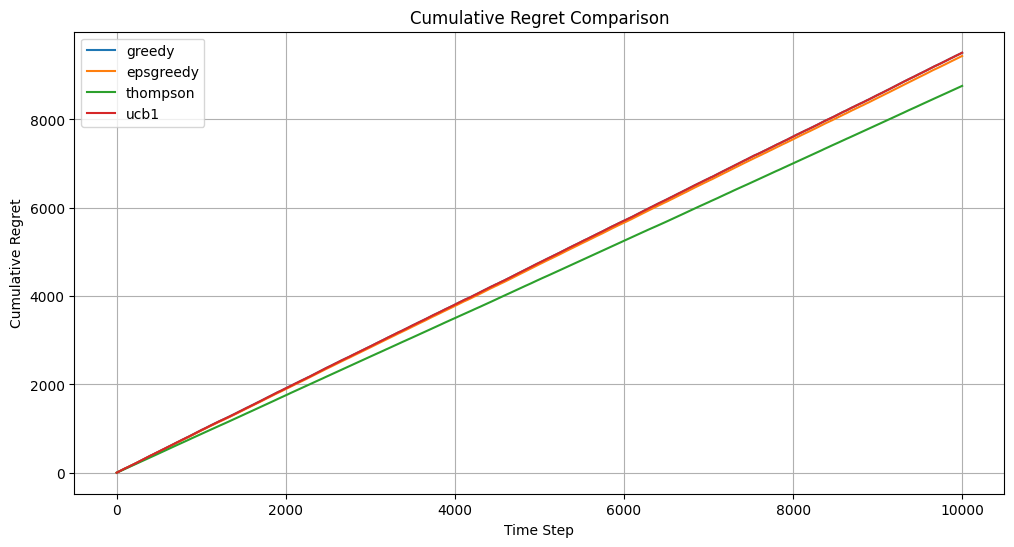

In [51]:
plt.figure(figsize=(12, 6))

for label in regret_curves:
    plt.plot(regret_curves[label], label=label)
    
plt.xlabel("Time Step")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret Comparison")
plt.legend()
plt.grid(True)
plt.show()

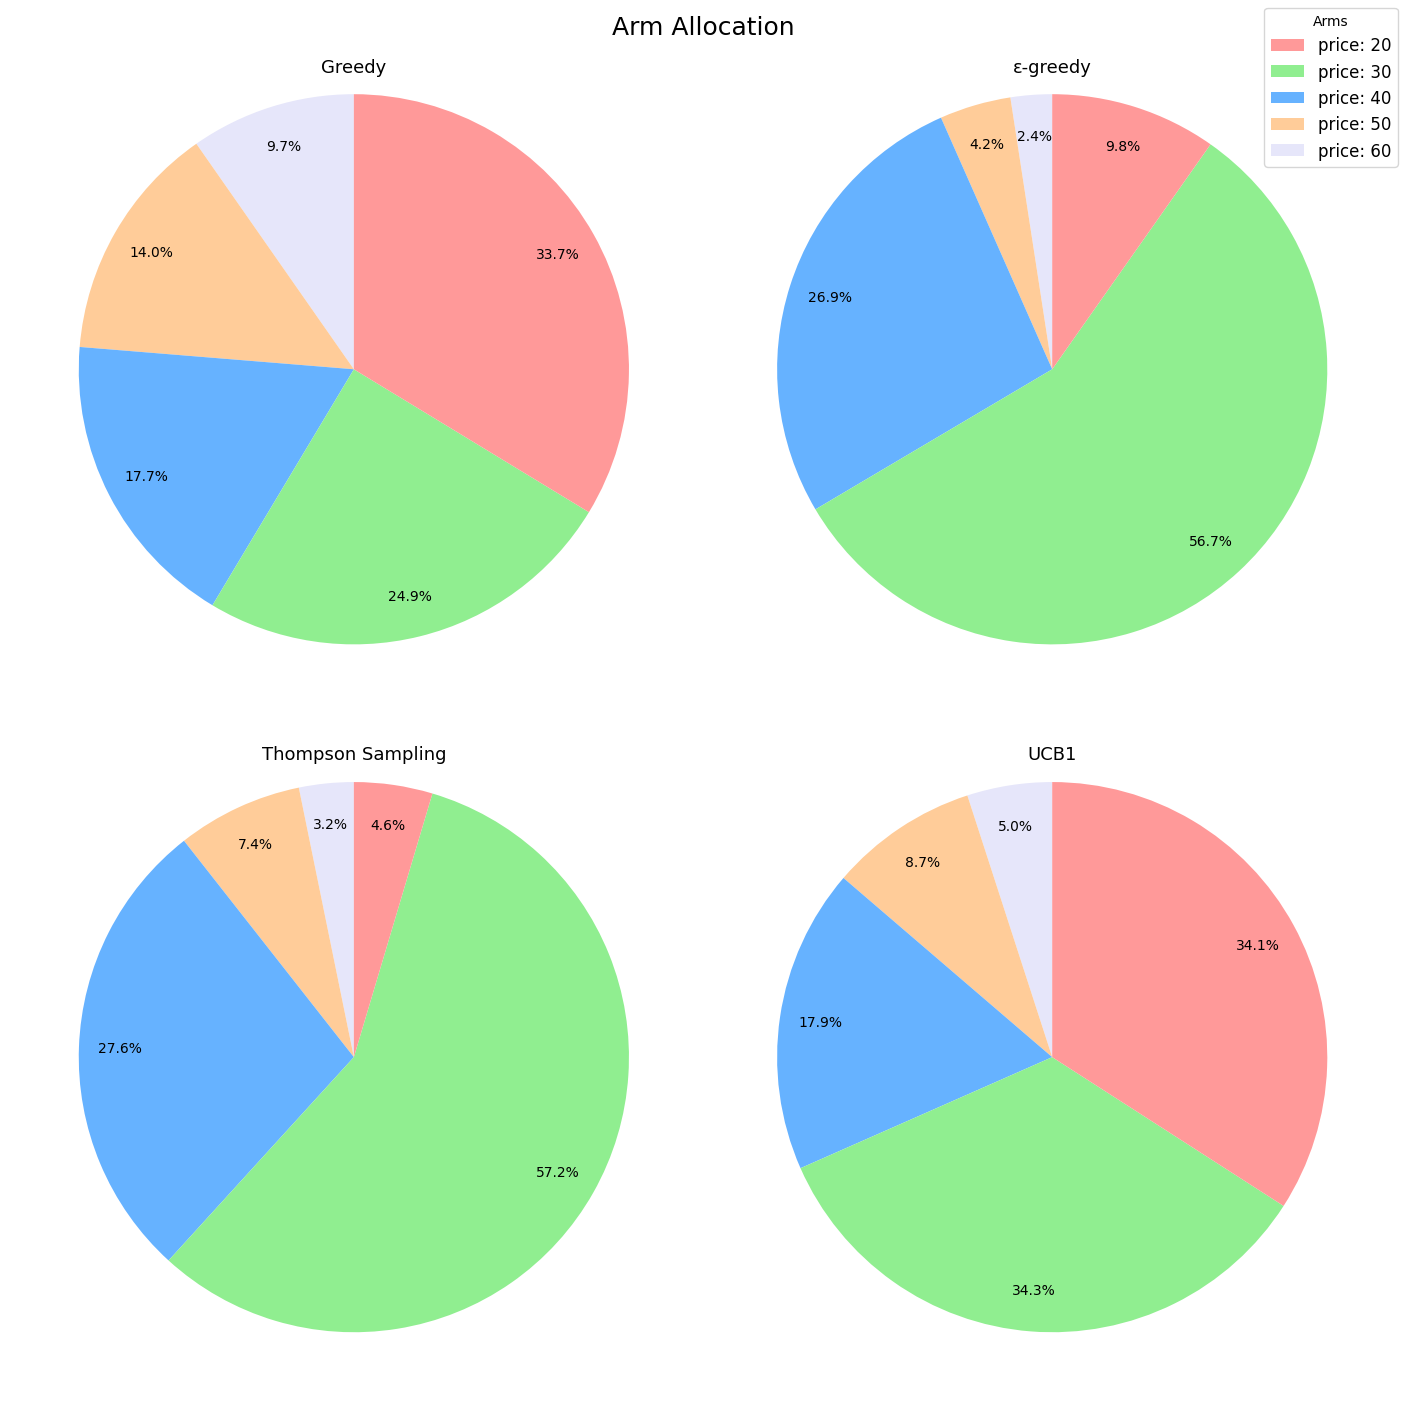

In [52]:
def plot_arm_allocations(arm_allocations):
    colors = ['#167288', '#8cdaec', '#b45248', '#d48c84', '#a89a49', 
              '#d6cfa2', '#3cb464', '#9bddb1', '#643c6a', '#836394']
    
    labels_with_price = ["arm: 1", "arm: 2", "arm: 3", "arm: 4", "arm: 5",
                        "arm: 6", "arm: 7", "arm: 8", "arm: 9", "arm: 10"]
    
    strategy_titles = ["Greedy", "ε-greedy", "Thompson Sampling", "UCB1"]

    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    fig.suptitle("Arm Allocation", fontsize=18, y=0.99)
    axes = axes.ravel()

    for i, strategy in enumerate(strategy_titles):
        ax = axes[i]
        wedges, texts, autotexts = ax.pie(
            arm_allocations[i][::-1],
            autopct='%1.1f%%',
            startangle=90,
            colors=colors[::-1],
            pctdistance=0.85,
        )

        # Increase the size and weight of the percentage labels
        for text in autotexts:
            text.set(size=10)

        ax.set_title(strategy, fontsize=13, y=0.92)

    fig.legend(wedges[::-1], labels_with_price, title="Arms", loc="upper right", fontsize='large')
    plt.tight_layout(pad=0.01)
    plt.show()

# Data from the simulation run results
arm_allocations = [
    # [33.69363, 24.89811, 17.70132, 14.00271, 9.70423],  # greedy
    # [9.76318, 56.73229, 26.87944, 4.19293, 2.43216],    # epsgreedy
    # [4.60987, 57.15172, 27.64446, 7.38585, 3.2081],     # thompson
    # [34.09561, 34.29079, 17.90161, 8.72104, 4.99095]     # ucb1-0.7-norm
]

# Plotting
plot_arm_allocations(arm_allocations)


References:

1. [Solving Multi Armed Bandits by Ankit Choudhary](https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/)

2. [Dynamic pricing MAB by Massimiliano Costacurta
](https://towardsdatascience.com/dynamic-pricing-with-multi-armed-bandit-learning-by-doing-3e4550ed02ac)